# 데이터마이닝- 중간 과제 02

### 학    번 : 201685-010100
###  성    명 : 지 용 기
###  연 락 처 : 010-9828-0332, braveji@hanmail.net
---

## 5강 연습문제

### 5-1 아래의 자료는 1970년 미국의 도시의 인구 100,000명 당 범죄 비율에 대한 자료다.

```
도시,살인비율,강간비율,강도비율,폭행비율,강도비율,절도비율,차절도비율
Atlanta,16.5,24.8,106,147,1112,905,494
Boston,4.2,13.3,122,90,982,669,954
Chicago,11.6,24.7,340,242,808,609,645
Dallas,18.1,34.2,184,293,1668,901,602
Denver,6.9,41.5,173,191,1534,1368,780
Detroit,13,35.7,477,220,1566,1183,788
Hartford,2.5,8.8,68,103,1017,724,468
Honolulu,3.6,12.7,42,28,1457,1102,637
Houston,16.8,26.6,289,186,1509,787,697
KansasCity,10.8,43.2,255,226,1494,955,765
LosAngeles,9.7,51.8,286,355,1902,1386,862
NewOrleans,10.3,39.7,266,283,1056,1036,776
NewYork,9.4,19.4,522,267,1674,1392,848
Portland,5,23,157,144,1530,1281,488
Tucson,5.1,22.9,85,148,1206,756,483
Washington,12.5,27.6,524,217,1496,1003,739
```

#### (1) 위 자료에 대하여 단일연결법, 완전연결법, 표균연결법에 의한 계층적 군집화를 시행하고 각 방법에 대한 나무형 그림 산출하라.( 유클리디안 거리를 사용하라.)

In [3]:
usa_crime <- read.csv( '05_01.csv' , head=T)
rowname <- usa_crime[ , 1]
usa_crime <- usa_crime[ , -1]
rownames(usa_crime) <- rowname
usa_crime

,murder,rape,burglar,violence,burglar2,theft,car_theft
Atlanta,16.5,24.8,106,147,1112,905,494
Boston,4.2,13.3,122,90,982,669,954
Chicago,11.6,24.7,340,242,808,609,645
Dallas,18.1,34.2,184,293,1668,901,602
Denver,6.9,41.5,173,191,1534,1368,780
Detroit,13,35.7,477,220,1566,1183,788
Hartford,2.5,8.8,68,103,1017,724,468
Honolulu,3.6,12.7,42,28,1457,1102,637
Houston,16.8,26.6,289,186,1509,787,697
KansasCity,10.8,43.2,255,226,1494,955,765


- 각각의 변수들간의 스케일이 다르므로 표준화 처리한 것과 하지 않았을때을 비교하기 위해서 2가지 방법으로 거리를 계산함.

In [4]:
usa_crime.dist <- dist(usa_crime, method = "euclidean")

usa_crime.scale <- scale( usa_crime, center = FALSE, scale = TRUE )
usa_crime.scale_dist <- dist( usa_crime.scale , method = "euclidean")

#### 단일연결법

In [5]:
usa_crime.dist.hclust_single <- hclust(usa_crime.dist, method="single")
usa_crime.scale_dist.hclust_single <- hclust(usa_crime.scale_dist, method="single")

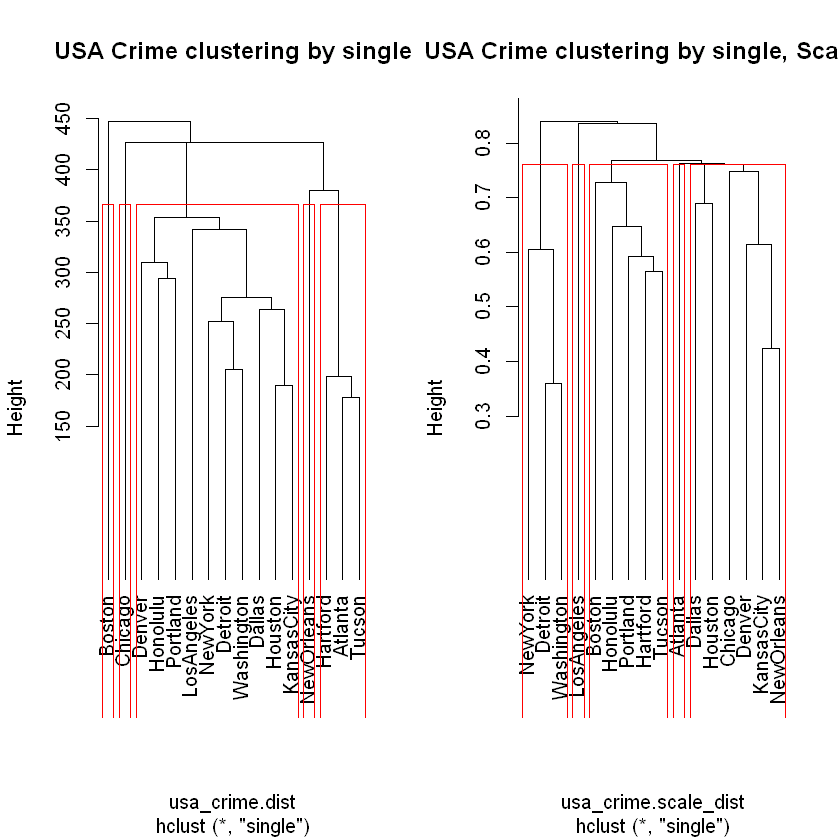

In [6]:
par(mfrow = c(1, 2))
plot(usa_crime.dist.hclust_single, hang = -1, main = "USA Crime clustering by single")
rect.hclust(usa_crime.dist.hclust_single, k=5, border="red")


plot(usa_crime.scale_dist.hclust_single, hang = -1, main = "USA Crime clustering by single, Scaling")
rect.hclust(usa_crime.scale_dist.hclust_single, k=5, border="red")
par(mfrow = c(1, 1))

- 위와 같이 변수들의 단위를 표준화했을때와 하지 않았을때가 다른 결과를 보여주고 있음.

- pvclust()함수는 multiscale bootstrap resampling을 기반으로 계층형 클러스터링에 대한 p-value을 제공하는 패키지임.
- 이 클러스터링 방법은 p-value가 높은 것을 제공함.

In [7]:
install.packages("pvclust" , repos='http://cran.ism.ac.jp/' )

package 'pvclust' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Y.G JI\AppData\Local\Temp\Rtmpk5iKnJ\downloaded_packages


In [8]:
library(pvclust)

Bootstrap (r = 0.43)... Done.
Bootstrap (r = 0.57)... Done.
Bootstrap (r = 0.57)... Done.
Bootstrap (r = 0.71)... Done.
Bootstrap (r = 0.86)... Done.
Bootstrap (r = 1.0)... Done.
Bootstrap (r = 1.0)... Done.
Bootstrap (r = 1.14)... Done.
Bootstrap (r = 1.29)... Done.
Bootstrap (r = 1.29)... Done.


Warning message:
In a$p[] <- c(1, bp[r == 1]): number of items to replace is not a multiple of replacement length

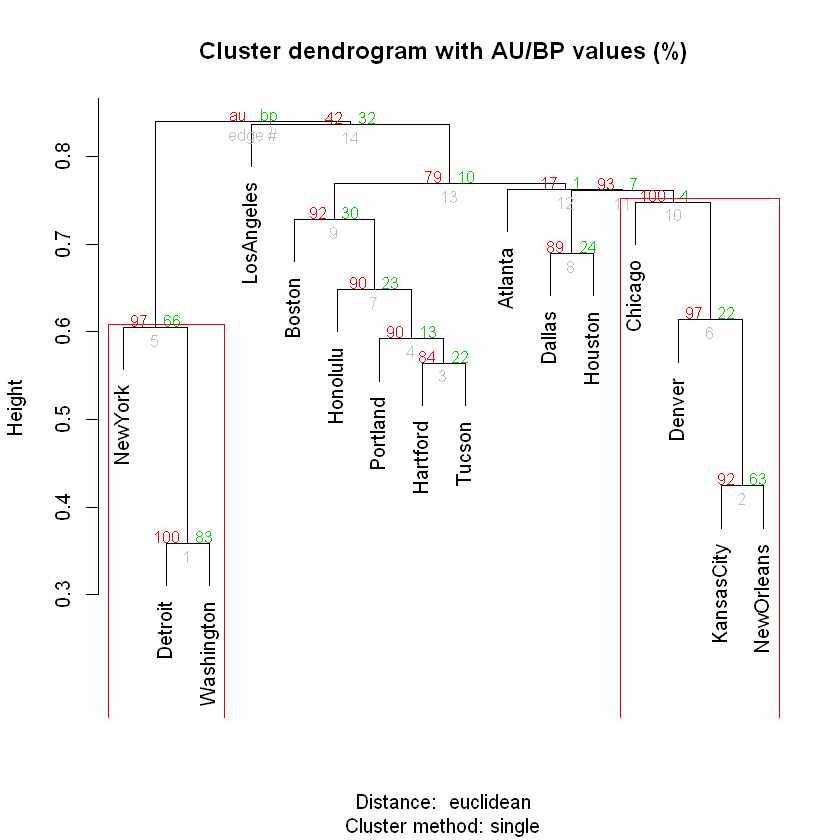

In [9]:
usa_crime.scale.pvclust <- pvclust(t(usa_crime.scale), 
                                   method.hclust="single", 
                                   method.dist="euclidean")
plot(usa_crime.scale.pvclust)
pvrect(usa_crime.scale.pvclust, alpha=.95)

#### 완전연결법

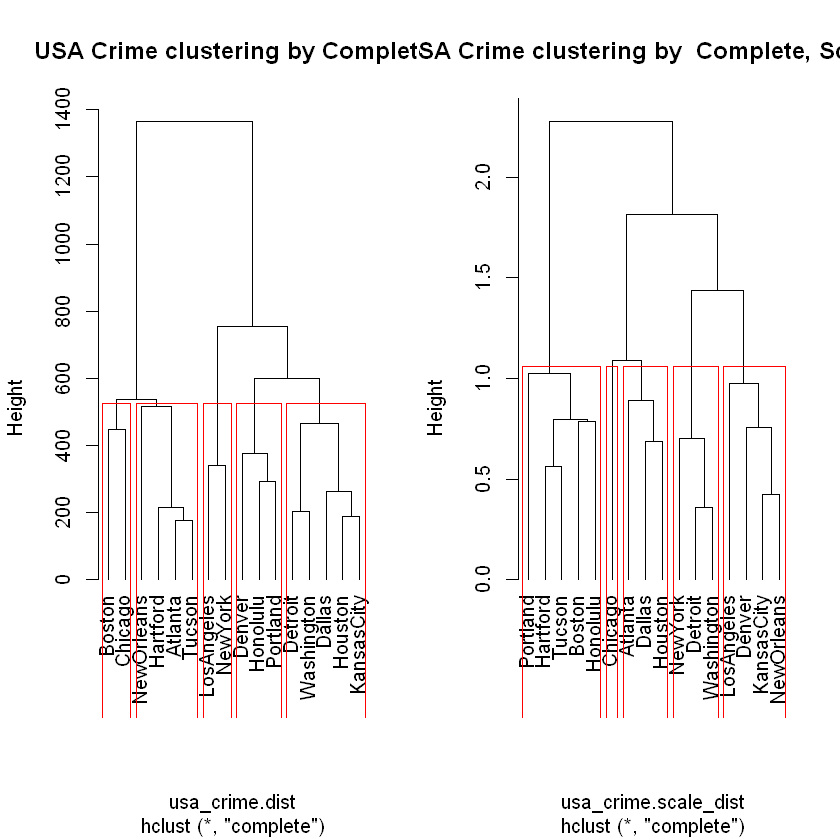

In [10]:
usa_crime.dist.hclust_complete <- hclust(usa_crime.dist, method="complete")
usa_crime.scale_dist.hclust_complete <- hclust(usa_crime.scale_dist, method="complete")

par(mfrow = c(1, 2))
plot(usa_crime.dist.hclust_complete, hang = -1, main = "USA Crime clustering by Complete")
rect.hclust(usa_crime.dist.hclust_complete, k=5, border="red")


plot(usa_crime.scale_dist.hclust_complete, hang = -1, main = "USA Crime clustering by  Complete, Scaling")
rect.hclust(usa_crime.scale_dist.hclust_complete, k=5, border="red")
par(mfrow = c(1, 1))

#### 평균연결법

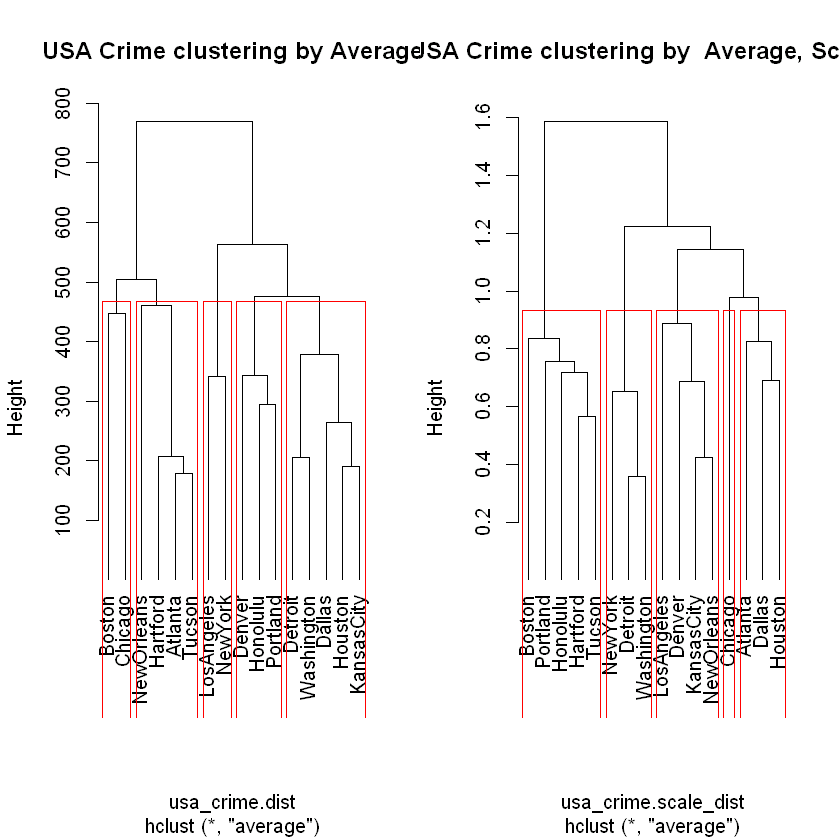

In [16]:
usa_crime.dist.hclust_average <- hclust(usa_crime.dist, method="average")
usa_crime.scale_dist.hclust_average <- hclust(usa_crime.scale_dist, method="average")

par(mfrow = c(1, 2))
plot(usa_crime.dist.hclust_average, hang = -1, main = "USA Crime clustering by Average")
rect.hclust(usa_crime.dist.hclust_average, k=5, border="red")

plot(usa_crime.scale_dist.hclust_average, hang = -1, main = "USA Crime clustering by  Average, Scaling")
rect.hclust(usa_crime.scale_dist.hclust_average, k=5, border="red")
par(mfrow = c(1, 1))

#### (2) (1)에서의 나무형 그림을 통하여 군집의 수를 정하라.

In [17]:
cutree( usa_crime.scale_dist.hclust_single, 5 )

Atlanta     Boston    Chicago     Dallas     Denver    Detroit   Hartford 
         1          2          3          3          3          4          2 
  Honolulu    Houston KansasCity LosAngeles NewOrleans    NewYork   Portland 
         2          3          3          5          3          4          2 
    Tucson Washington 
         2          4

In [18]:
cutree( usa_crime.scale_dist.hclust_complete, 5 )

Atlanta     Boston    Chicago     Dallas     Denver    Detroit   Hartford 
         1          2          3          1          4          5          2 
  Honolulu    Houston KansasCity LosAngeles NewOrleans    NewYork   Portland 
         2          1          4          4          4          5          2 
    Tucson Washington 
         2          5

In [19]:
cutree( usa_crime.scale_dist.hclust_average, 5 )

Atlanta     Boston    Chicago     Dallas     Denver    Detroit   Hartford 
         1          2          3          1          4          5          2 
  Honolulu    Houston KansasCity LosAngeles NewOrleans    NewYork   Portland 
         2          1          4          4          4          5          2 
    Tucson Washington 
         2          5

- 평균연결방법으로 5개의 클러스터로 구성하면,
    -  1) Atlanta, Dallas, Houston
    -  2) Boston, Hartford, Honolulu, Portland, Tucson
    -  3) Chicago
    -  4) Denver, KansasCity, LosAngeles, NewOrleans
    -  5) Detroit, NewYork, Washington

#### (3) 분할분석을 이용한 계층적 군집화를 시행하고 나무형그림을 산출하고 (1)에서의 결과와 비교하라.

In [27]:
install.packages("cluster" , repos='http://cran.ism.ac.jp/' )


  There is a binary version available but the source version is later:
        binary source needs_compilation
cluster  2.0.4  2.0.5              TRUE



installing the source package 'cluster'

Warning message:
: 명령 '"C:/Anaconda2/R/bin/x64/R" CMD INSTALL -l "C:\Anaconda2\R\library" C:\Users\YE5B7~1.GJI\AppData\Local\Temp\Rtmpk5iKnJ/downloaded_packages/cluster_2.0.5.tar.gz'의 실행으로 상태 1가 되었습니다Warning message:
In install.packages("cluster", repos = "http://cran.ism.ac.jp/"): installation of package 'cluster' had non-zero exit status

In [28]:
library( cluster )

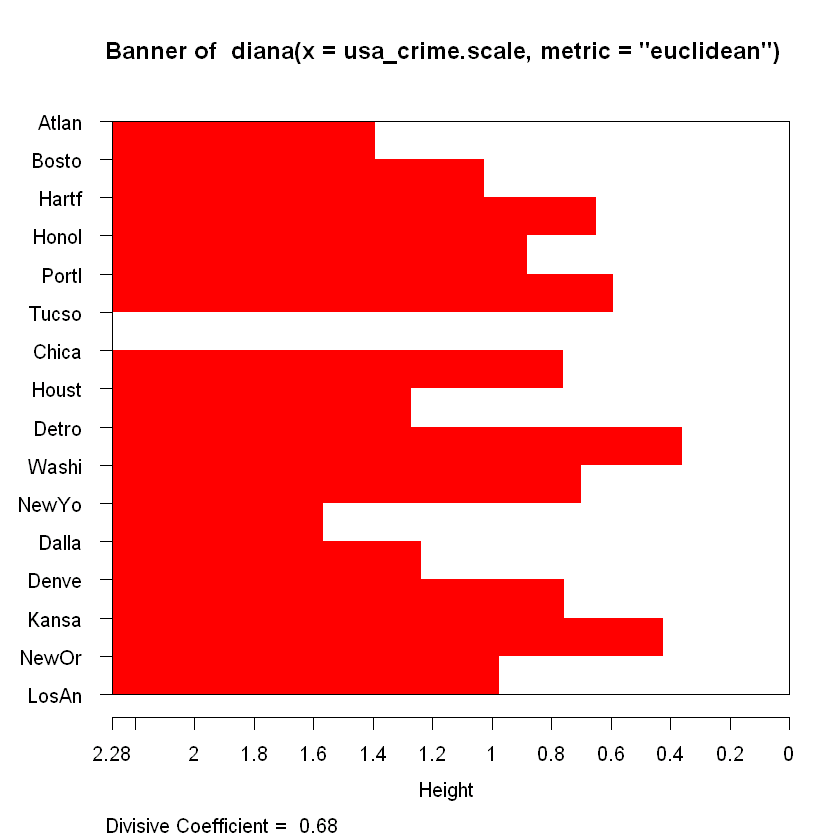

[1] 1 2 3 4 4 5 2 2 3 4 4 4 5 2 2 5

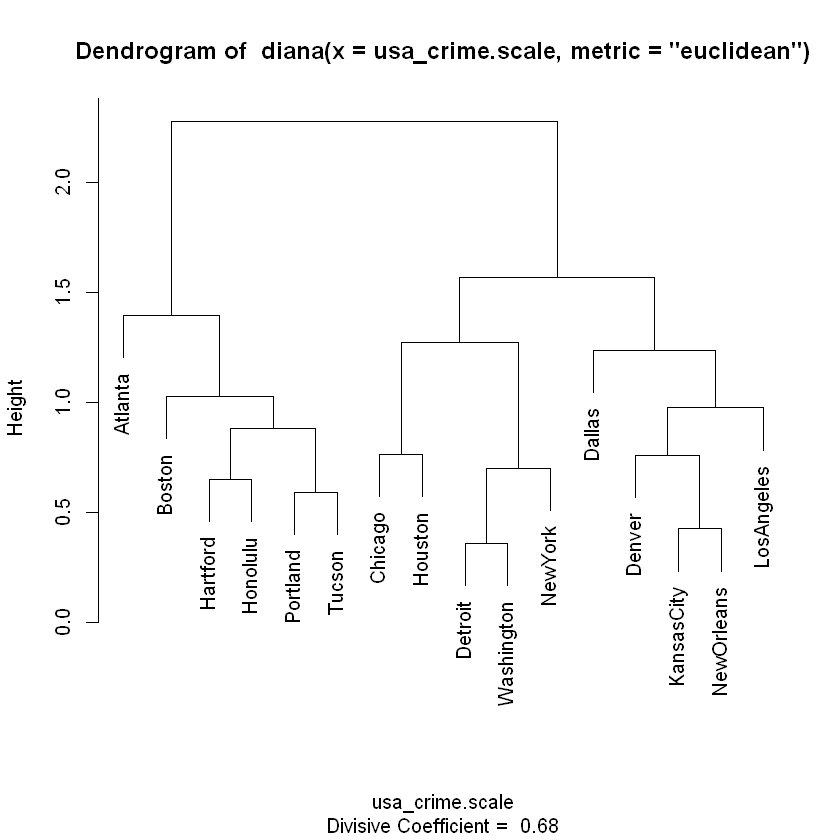

In [33]:
usa_crime.scale.diana <- diana( usa_crime.scale , metric="euclidean" )
plot(usa_crime.scale.diana)
cutree( usa_crime.scale.diana , 5)

- 5개의 클러스터로 구성하면,
    -  1) Atlanta
    -  2) Boston, Chicago, Houston, Denver, NewOrleans, KansasCity
    -  3) Hartford, Detroit, 
    -  4) Honolulu, Portland, Washington, NewYork, Dallas
    -  5) Tucson, LosAngeles


- 평균연결방법으로 5개의 클러스터로 구성하면,
    -  1) Atlanta, Dallas, Houston
    -  2) Boston, Hartford, Honolulu, Portland, Tucson
    -  3) Chicago
    -  4) Denver, KansasCity, LosAngeles, NewOrleans
    -  5) Detroit, NewYork, Washington

- 이 2가지 방법은 전혀 다른 결과를 보여주고 있음.

### 5-2 다음 자료는 우리나라 상장기업을 대상으로 수권자본금(X1), 2000년도 최고주가(X2), 2000년도 최저 PER(X3), 2000년도 12월말 자산총계(X4), 2000년도말 총매출액(X5)등을 조사한 결과이다. 

####  (1) 각 변수의 표준화한 값을 구하라.

In [21]:
company <- read.csv( '05_02.csv' , head=T)
company
rowname2 <- company[ , 2]
company <- company[ , c(-1, -2)]
rownames(company) <- rowname2
company

,X,X.1,X1,X2,X3,X4,X5
1,롯데삼강,Lotte Samkang,90,475,9.3,1010,1641
2,해태유업,Haitai Dairy,200,132,4.4,1094,1433
3,대림수산,Daelim Fisheries,256,239,39.5,1578,1810
4,삼양식품,Samyang Foods,150,352,38.2,2604,2412
5,백 양,white poplar,150,1240,3.6,1543,3233
6,동일방직,same textile,150,506,22.9,1438,1079
7,코오롱,Kolon,3000,360,7.2,9666,7271
8,태광산업,Taekwang,80,5100,2.7,6062,2735
9,진도패션,Fashion progress,200,142,36.4,534,523
10,한솔제지,Hansol Paper,1000,423,14.1,9559,4840


,X1,X2,X3,X4,X5
Lotte Samkang,90,475,9.3,1010,1641
Haitai Dairy,200,132,4.4,1094,1433
Daelim Fisheries,256,239,39.5,1578,1810
Samyang Foods,150,352,38.2,2604,2412
white poplar,150,1240,3.6,1543,3233
same textile,150,506,22.9,1438,1079
Kolon,3000,360,7.2,9666,7271
Taekwang,80,5100,2.7,6062,2735
Fashion progress,200,142,36.4,534,523
Hansol Paper,1000,423,14.1,9559,4840


In [22]:
company.scale <- scale( company )
company.scale

,X1,X2,X3,X4,X5
Lotte Samkang,-0.6396972,-0.1351121,-0.7932559,-0.7143178,-0.5882081
Haitai Dairy,-0.5993030,-0.4343167,-1.1658074,-0.7049607,-0.6258020
Daelim Fisheries,-0.5787387,-0.3409788,1.5028778,-0.6510462,-0.5576630
Samyang Foods,-0.6176640,-0.2424071,1.4040376,-0.5367564,-0.4488576
white poplar,-0.6176640,0.5322100,-1.2266322,-0.6549450,-0.3004701
same textile,-0.6176640,-0.1080703,0.2407646,-0.6666413,-0.6897839
Kolon,0.4289130,-0.2354285,-0.9529208,0.2499054,0.4293577
Taekwang,-0.6433694,3.8993515,-1.2950600,-0.1515572,-0.3904786
Fashion progress,-0.5993030,-0.4255935,1.2671820,-0.7673412,-0.7902753
Hansol Paper,-0.30552704,-0.18047259,-0.42830751,0.23798629,-0.01002102


####  (2) 단일연결법과 완전연결법을 이용하여 기업들을 2개 집단과 5개 집단으로 군집화를 실시하여 두 방법을 비교설명하라.

In [3]:
company.dist <- dist(company.scale, method = "euclidean")

company.dist.hclust_single <- hclust(company.dist, method="single")
company.dist.hclust_complete <- hclust(company.dist, method="complete")

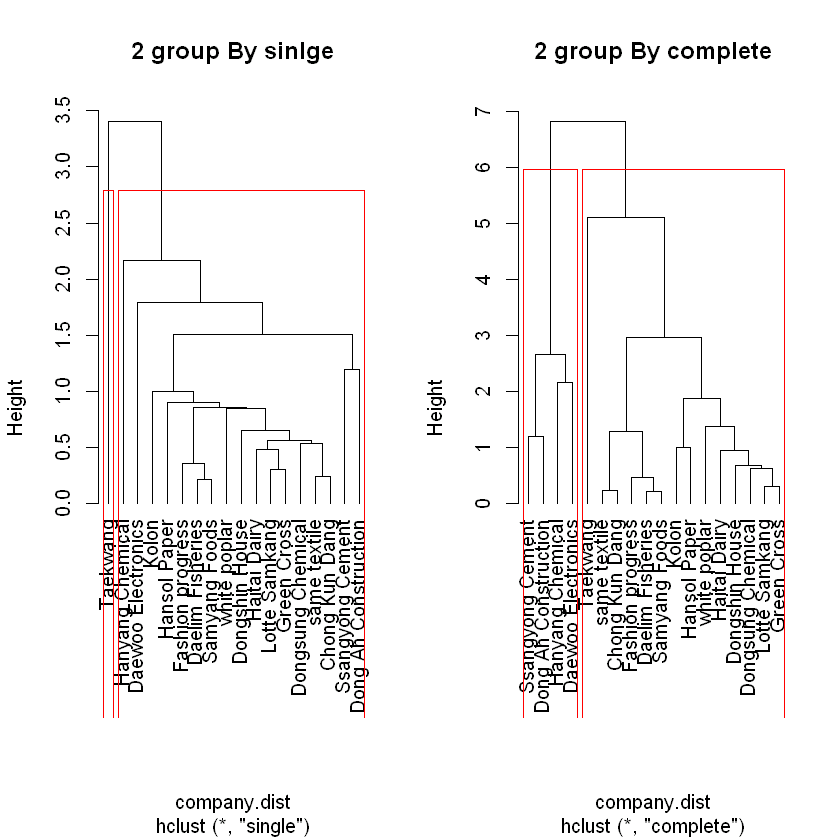

In [12]:
par(mfrow = c(1, 2))
plot(company.dist.hclust_single, hang = -1, main = "2 group By sinlge")
rect.hclust(company.dist.hclust_single, k=2, border="red")

plot(company.dist.hclust_complete, hang = -1, main = "2 group By complete")
rect.hclust(company.dist.hclust_complete, k=2, border="red")
par(mfrow = c(1, 1))

- 2개의 그룹으로 나누면, 
    - 단일연결법은 태광산업을 1번 그룹,  기타 모든 회사 2번 그룹로 나누고,
    - 완전연결법은 삼양식품, 동아건설, 한양화학, 대우전자를 1번 그룹으로 기타 모든 회사를 2번 그룹으로 나눔.

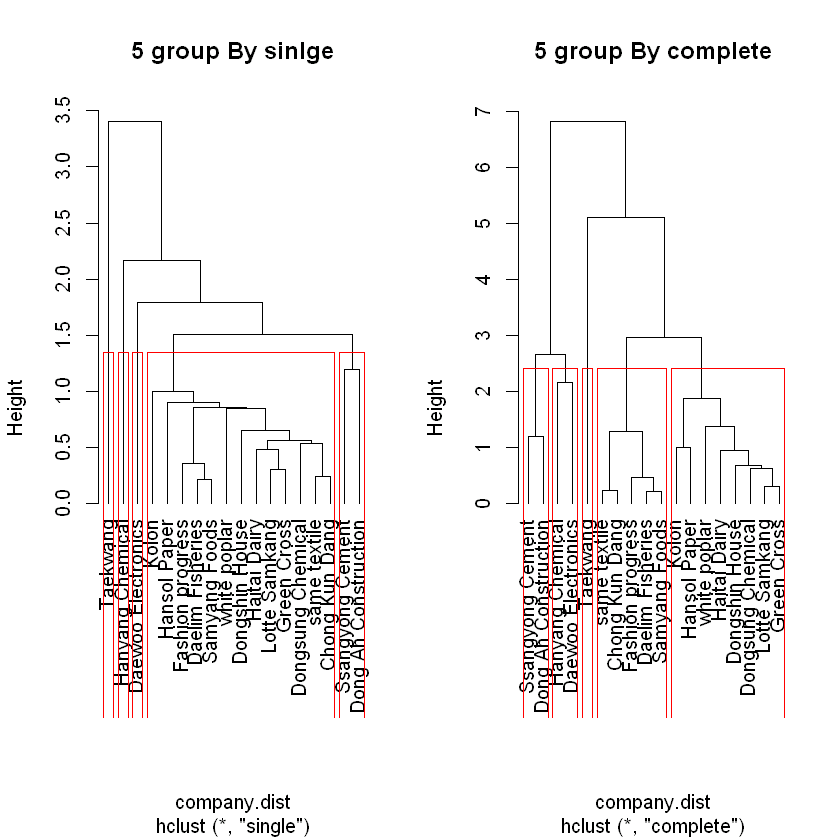

In [13]:
par(mfrow = c(1, 2))
plot(company.dist.hclust_single, hang = -1, main = "5 group By sinlge")
rect.hclust(company.dist.hclust_single, k=5, border="red")

plot(company.dist.hclust_complete, hang = -1, main = "5 group By complete")
rect.hclust(company.dist.hclust_complete, k=5, border="red")
par(mfrow = c(1, 1))

- 5개의 그룹으로 나누면, 
    - 단일연결법은 태광산업을 1번, 한양화학을 2번, 대우전자를 3번, 쌍용양회과 동아건설을 5번, 나머지를 4번 그룹으로 나눔.
    - 완전연결법은 삼양식품과 동아건설을 1번, 한양화학과 대우전자를 2번, 태광산업을 3번, 동일방직, 종근당, 진도패션, 대림수산, 삼양식품을 4번 나머지를 5번 그룹으로 나눔.

#### (3) 분석결과를 종합적으로 설명하라.

#### (4) 각 변수를 사이의 유사성측정을 디폴트값이 아닌 상관계수를 이용하여 위의 분석을 실시 한 후에 디폴트 값인 Eulidean제곱거리에 의한 방법과 비교하라.

In [36]:
dissimilarity <- 1 - cor( t( company.scale ) )
company.dist_cor <- as.dist(dissimilarity)
company.dist_cor

                     Lotte Samkang Haitai Dairy Daelim Fisheries Samyang Foods
Haitai Dairy           0.252622027                                            
Daelim Fisheries       1.362096444  1.881981095                               
Samyang Foods          1.335360011  1.873929026      0.003010738              
white poplar           0.036462816  0.128988455      1.574074410   1.542961140
same textile           0.898528315  1.571731125      0.119910015   0.112202697
Kolon                  0.940320742  0.300237744      1.929234160   1.941409312
Taekwang               0.029074613  0.316380066      1.317879747   1.283882291
Fashion progress       1.343061684  1.864838437      0.004055149   0.011534447
Hansol Paper           0.994628646  0.600323313      1.669539196   1.626611029
Hanyang Chemical       1.821986189  1.435355319      0.881868258   0.944045622
Dongsung Chemical      0.817073535  1.426322808      0.220704607   0.235503596
Chong Kun Dang         1.119145160  1.729037660     

In [37]:
company.dist_cor.hclust_single <- hclust(company.dist_cor, method="single")
company.dist_cor.hclust_complete <- hclust(company.dist_cor, method="complete")

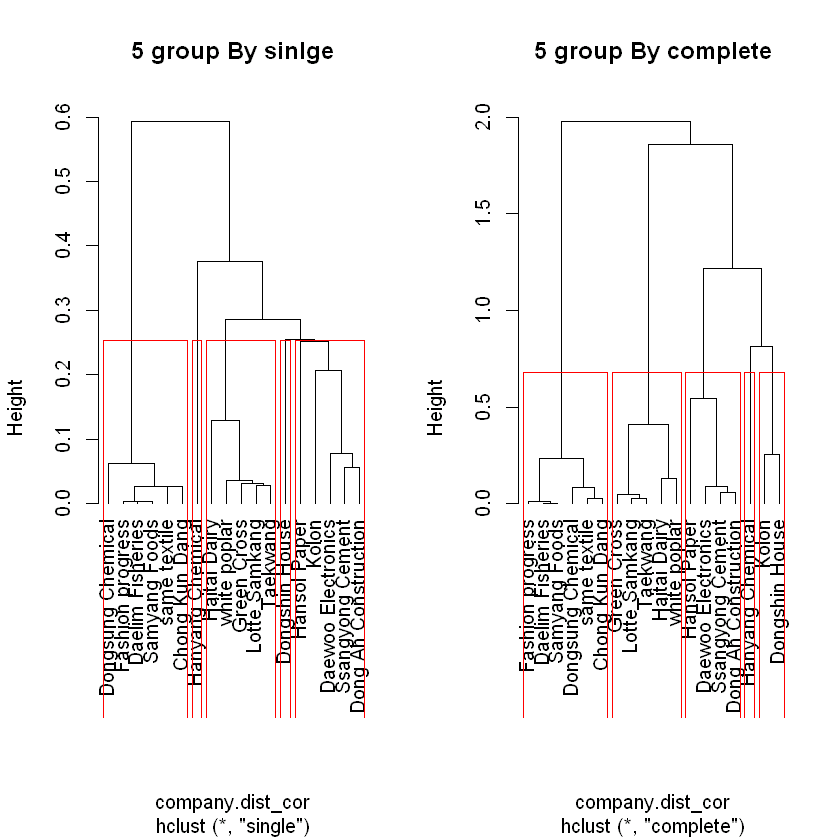

In [38]:
par(mfrow = c(1, 2))
plot(company.dist_cor.hclust_single, hang = -1, main = "5 group By sinlge")
rect.hclust(company.dist_cor.hclust_single, k=5, border="red")

plot(company.dist_cor.hclust_complete, hang = -1, main = "5 group By complete")
rect.hclust(company.dist_cor.hclust_complete, k=5, border="red")
par(mfrow = c(1, 1))